In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.nonparametric.smoothers_lowess import lowess

In [3]:
drug_tf_activities = pd.read_csv('../results/drug_signatures/signatures_bing_gene_dorothea.csv', sep=',', header=0,
                     index_col=0)

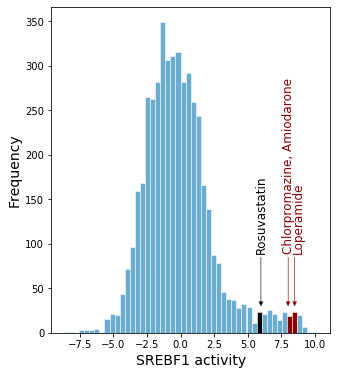

In [4]:
data = drug_tf_activities['SREBF1']
fig, ax = plt.subplots(figsize = (5,6))
N, bins, patches = plt.hist(drug_tf_activities['SREBF1'], edgecolor='white', linewidth=0.5, bins = 50, color = "#6bacd1")
loper = drug_tf_activities.loc['loperamide', 'SREBF1']
amio = drug_tf_activities.loc['amiodarone', 'SREBF1']
cp = drug_tf_activities.loc['chlorpromazine', 'SREBF1']
rosu = drug_tf_activities.loc['rosuvastatin', 'SREBF1']

for drug in [loper, amio, cp]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('darkred')
            break       
for drug in [rosu]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('black')
            break       

            
plt.arrow(rosu, 85, 0, -50, head_width=0.3, head_length=5, color='k', linewidth = 0.3)
plt.arrow(cp, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)
plt.arrow(loper+0.1, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)

plt.text(rosu, 92, 'Rosuvastatin', color='k', rotation = 90, ha = 'center', fontsize = 12)
plt.text(cp, 92, 'Chlorpromazine, Amiodarone', color='darkred', rotation = 90, ha = 'center', fontsize = 12)
plt.text(loper-0.1, 92,'Loperamide', color='darkred', rotation = 90, ha = 'left', fontsize = 12)

plt.xlabel('SREBF1 activity', fontsize=14)
plt.ylabel('Frequency',  fontsize=14)            
plt.show()

In [5]:
loper, amio, cp

(8.38914158803728, 8.111052198082481, 8.00115295346842)

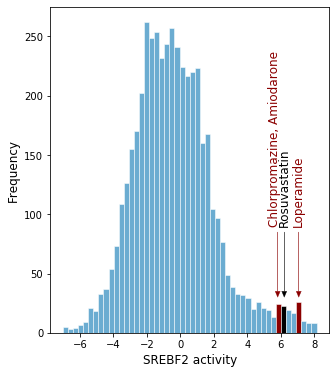

In [6]:
fig, axs = plt.subplots(figsize = (5,6))
N, bins, patches = plt.hist(drug_tf_activities['SREBF2'], edgecolor='white', linewidth=0.5, bins = 50, color = "#6bacd1")
loper = drug_tf_activities.loc['loperamide', 'SREBF2']
amio = drug_tf_activities.loc['amiodarone', 'SREBF2']
cp = drug_tf_activities.loc['chlorpromazine', 'SREBF2']
rosu = drug_tf_activities.loc['rosuvastatin', 'SREBF2']

for drug in [loper, amio, cp]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('darkred')
            break       
for drug in [rosu]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('black')
            break
            
plt.arrow(rosu+0.15, 85, 0, -50, head_width=0.3, head_length=5, color='k', linewidth = 0.3)
plt.arrow(cp-0.1, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)
plt.arrow(loper+0.1, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)

plt.text(rosu+0.15, 92, 'Rosuvastatin', color='k', rotation = 90, ha = 'center', fontsize = 12)
plt.text(cp+0.1, 92, 'Chlorpromazine, Amiodarone', color='darkred', rotation = 90, ha = 'right', fontsize = 12)
plt.text(loper+0.1, 92,'Loperamide', color='darkred', rotation = 90, ha = 'center', fontsize = 12)

plt.xlabel('SREBF2 activity', fontsize=12)
plt.ylabel('Frequency',  fontsize=12)            
plt.show()

# Linear models

In [7]:
drugmap = {'dmso':'DMSO', 'mbcd': 'MBCD', 'amio': 'Amiodarone', 
           'loper':'Loperamide', 'cp':'Chlorpromazine', 'rosu':'Rosuvastatin'}

In [8]:
colormap = {'dmso':'#fc8403', 'mbcd': '#6bacd1', 'amio': '#6447EE', 
           'loper':'#0e4179', 'cp':'#A92A00', 'rosu':'#EEB847'}

In [9]:
# filtered with std
exp1a = pd.read_csv('../results/cholesterol_sensor_experiments/exp1a_results_lp_std023_mp_complete.csv', index_col = 0)
exp1b = pd.read_csv('../results/cholesterol_sensor_experiments/exp1b_results_lp_std023_mp_complete.csv', index_col = 0)
exp2a = pd.read_csv('../results/cholesterol_sensor_experiments/exp2a_results_lp_std015_mp_complete.csv', index_col = 0)
exp2b = pd.read_csv('../results/cholesterol_sensor_experiments/exp2b_results_lp_std015_mp_complete.csv', index_col = 0)
exp3a = pd.read_csv('../results/cholesterol_sensor_experiments/exp3a_results_lp_std0135_mp_complete.csv', index_col = 0)
exp3b = pd.read_csv('../results/cholesterol_sensor_experiments/exp3b_results_lp_std0135_mp_complete.csv', index_col = 0)
exp3c = pd.read_csv('../results/cholesterol_sensor_experiments/exp3c_results_lp_std0135_mp_complete.csv', index_col = 0)
exp4a = pd.read_csv('../results/cholesterol_sensor_experiments/exp4a_results_lp_std015_mp_complete.csv', index_col = 0)
exp4b = pd.read_csv('../results/cholesterol_sensor_experiments/exp4b_results_lp_std015_mp_complete.csv', index_col = 0)

In [10]:
# exp1a = pd.read_csv('../results/results_from_cloud/exp1a_results_lp3_mp_complete.csv', index_col = 0)
# exp1b = pd.read_csv('../results/results_from_cloud/exp1b_results_lp3_mp_complete.csv', index_col = 0)
# exp2a = pd.read_csv('../results/results_from_cloud/exp2a_results_lp3_mp_complete.csv', index_col = 0)
# exp2b = pd.read_csv('../results/results_from_cloud/exp2b_results_lp3_mp_complete.csv', index_col = 0)
# exp3a = pd.read_csv('../results/results_from_cloud/exp3a_results_lp3_mp_complete.csv', index_col = 0)
# exp3b = pd.read_csv('../results/results_from_cloud/exp3b_results_lp3_mp_complete.csv', index_col = 0)
# exp3c = pd.read_csv('../results/results_from_cloud/exp3c_results_lp3_mp_complete.csv', index_col = 0)

In [11]:
exp1a.TimePoint = exp1a.TimePoint - 4
exp2a.TimePoint = exp2a.TimePoint - 4
exp3a.TimePoint = exp3a.TimePoint - 4
exp3c.TimePoint = exp3c.TimePoint + 12
exp4a.TimePoint = exp4a.TimePoint - 4

In [12]:
for exp in [exp1a, exp1b]: exp['ExpID'] = 'exp1_' + exp['WellRegion']
for exp in [exp2a, exp2b]: exp['ExpID'] = 'exp2_' + exp['WellRegion']
for exp in [exp3a, exp3b, exp3c]: exp['ExpID'] = 'exp3_' + exp['WellRegion']
for exp in [exp4a, exp4b]: exp['ExpID'] = 'exp4_' + exp['WellRegion']

In [13]:
for exp in [exp1a, exp1b]:
    exp['Time_min'] = exp['TimePoint'] * 9
for exp in [exp2a, exp2b, exp3a, exp3b, exp3c, exp4a, exp4b]:
    exp['Time_min'] = exp['TimePoint'] * 14

In [14]:
exp1 = exp1a.append(exp1b).reset_index()
exp2 = exp2a.append(exp2b).reset_index()
exp3bc = exp3b.append(exp3c)
exp3 = exp3bc.append(exp3a).reset_index()
exp3bc = exp3bc.reset_index()
exp4 = exp4a.append(exp4b).reset_index()

In [15]:
def prepare_for_statistics(data, time_col):
    tmp = data[data['Time_min'] <= 280].copy()
    tmp["Drug"] = pd.Categorical(tmp["Drug"],
                                categories = ["dmso", "amio", "cp", "loper","mbcd", "rosu"])
    
    return tmp

In [16]:
def plot_results_timemin(data, min_y = -0.8, max_time = 270):
    tmp = data.copy()
    tmp.Drug = tmp.Drug.map(drugmap)
    plot = sns.lineplot(data=tmp, x="Time_min", y="logRatio", hue = 'Drug')
    plt.axvline(0, color = 'r')
    plt.xticks(np.arange(-30, 21*14, 30))
    plot.set(xlim=(-30, max_time))
    plot.set(ylim=(min_y, -0.2))

In [17]:
def statistics(data, time_col):
    
    tmp = data.copy()
    tmp = prepare_for_statistics(tmp, time_col)
    tmp.Drug = tmp.Drug.map(drugmap)
    
    model = ols(f'logRatio ~ ExpID + {time_col} * Drug', data=tmp).fit() # 

    params = model.params[model.params.index.str.contains(':')]
    pvalues = model.pvalues[model.pvalues.index.str.contains(':')]
    result = pd.DataFrame({'coeff': params.values, 'p_values':pvalues.values}, index = params.index.str.slice(16,-1))

    result = result.sort_values(by='coeff').style.format('{:,.2e}'.format)

    
    return result

In [18]:
def make_lowess(data):
    # smoothing curves
    endog = data.logRatio
    exog = data.Time_min

    smooth = lowess(endog, exog)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=index) 

In [24]:
def plot_lowess_curves(data, min_y = -1.2, max_time = 270):
    
    # smoothing curves of each drugs
    smooth_dfs = {}
    for drug in data.Drug.unique():
        smooth_dfs[drug] = make_lowess(data[data.Drug == drug])

    # plot curves
    fig, ax = plt.subplots()
    for drug in smooth_dfs:
        data = smooth_dfs[drug][smooth_dfs[drug].index <= 20*14]
        fig = data.plot(label = drugmap[drug], color = colormap[drug])

        
    leg_lines = fig.get_lines()
    plt.setp(leg_lines, linewidth=2)

    
    plt.legend(loc='best')
    plt.axvline(0, color = 'r')
    plt.xticks(np.arange(-60, 280, 30))
    ax.set(xlim=(-30, max_time), xlabel = 'Time (min)')
    ax.set(ylim=(min_y, -0.2), ylabel = 'logRatio')
    plt.show()

In [20]:
# exp_all
exp_all = pd.DataFrame()
for exp in [exp1, exp2, exp3, exp4]:
    exp_all = exp_all.append(exp)

In [26]:
exp_all.to_csv('../results/cholesterol_sensor_experiments/exp_all_results.csv')

In [21]:
# exp_b_all
exp_b_all = pd.DataFrame()
for exp_b_all in [exp1b, exp2b, exp3bc, exp4b]:
    exp_b_all = exp_b_all.append(exp)

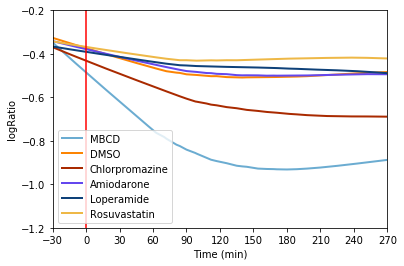

In [25]:
plot_lowess_curves(exp_all)

In [23]:
statistics(exp_b_all, 'Time_min')

,coeff,p_values
MBCD,-1.16e-03,1.18e-89
Chlorpromazine,-6.51e-04,5.17e-42
Loperamide,-2.00e-04,2.77e-05
Amiodarone,-8.98e-05,6.02e-02
Rosuvastatin,-2.04e-06,9.66e-01
